In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly import graph_objects as go
from nltk.corpus import stopwords
import re
from matplotlib import pyplot as plt

In [20]:
#read .txt data
df_neg = pd.read_csv("Datasets/Bengali Drama/all_negative_3307.txt", sep="\t", names=["text"], encoding="utf-8", on_bad_lines='skip')
df_pos = pd.read_csv("Datasets/Bengali Drama/all_positive_8500.txt", sep="\t", names=["text"], encoding="utf-8", on_bad_lines='skip')
df_neg['sentiment'] = 0
df_pos['sentiment'] = 1
df_neg['Tag'] = 'negative'
df_pos['Tag'] = 'positive'




In [22]:

#Merge the two dataframes
df = pd.concat([df_pos, df_neg], ignore_index=True)
#Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True) 



In [24]:
df.head(5)


,text,sentiment,Tag
0,ভালোই লাগলো নাটকটা,1,positive
1,নামাজের প্রতি সম্মান দেখানোটা খুব ভাল লাগলো।।।,1,positive
2,বস্তাপচা নাটক।,0,negative
3,অসাধারণ হইছে,1,positive
4,সত্যি নিশো ভাই তুমি বাংলা নাটকের কিংবদন্তি আর...,1,positive


In [26]:
#check null values
df.isnull().sum()

text         0
sentiment    0
Tag          0
dtype: int64

In [27]:
df.to_csv("processed_Bengali-Drama_data.csv", index=False)


### EDA

In [32]:
# Convert sentiment to a categorical type temporarily
df['sentiment'] = df['sentiment'].astype('category')

# Call describe again
df.describe(include='all')

,text,sentiment,Tag
count,11806,11806,11806
unique,10765,2,2
top,ফালতু নাটক,1,positive
freq,100,8499,8499


In [33]:

temp = df.groupby('sentiment').count()['text'].reset_index()


sentiment_mapping = {0: 'negative', 1: 'positive', 2: 'neutral'}
temp['sentiment'] = temp['sentiment'].map(sentiment_mapping)


temp = temp.sort_values(by='sentiment')

temp.style.background_gradient(cmap='Purples')

,sentiment,text
0,negative,3307
1,positive,8499


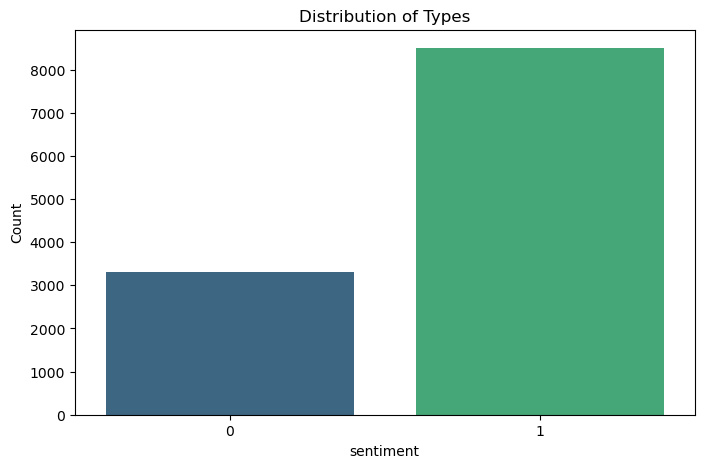

In [34]:

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Types')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

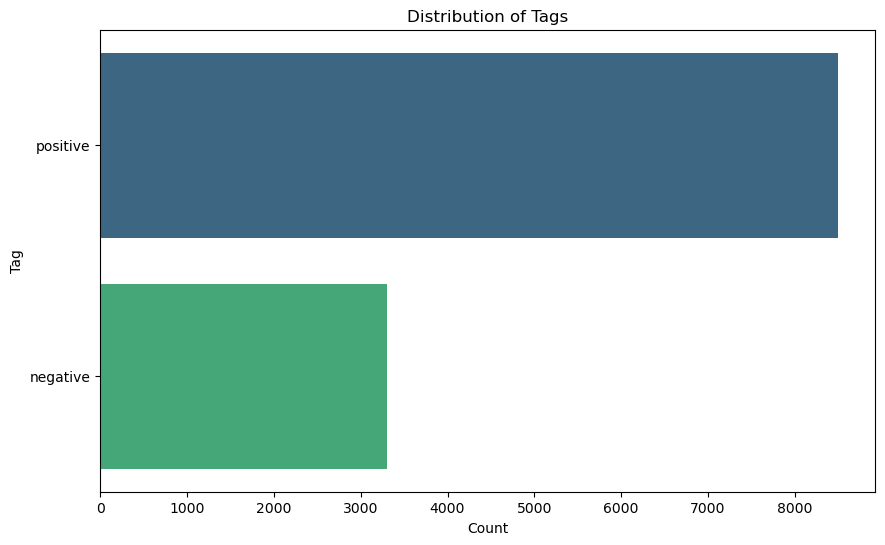

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Tag', data=df, palette='viridis', order=df['Tag'].value_counts().index)
plt.title('Distribution of Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

In [36]:
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text=temp.sentiment,
    values=temp.text,
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
))
fig.show()

#### Most common WOrds

In [37]:
from collections import Counter

df['temp_list'] = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,নাটক,4992
1,ভালো,2607
2,অনেক,2387
3,একটা,1703
4,সুন্দর,1697
5,অসাধারণ,1677
6,খুব,1302
7,এই,1267
8,ভাই,1209
9,আর,1206


In [38]:
df['temp_list'] = df['text'].apply(lambda x: str(x).split())
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('bengali')]
df['temp_list'] = df['temp_list'].apply(remove_stopword)

In [39]:
# Remove punctuation
def remove_punctuation(temp_list):
    return [re.sub(r'[“”"\'।।.,!?()\[\]{}<>;:।‘’–—…]', '', word) for word in temp_list]

df['temp_list'] = df['temp_list'].apply(remove_punctuation)

#### Most common words after removing stopwords

In [40]:
def remove_space(x):
    return [y for y in x if y != '']
df['temp_list'] = df['temp_list'].apply(remove_space)

In [41]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,নাটক,5798
1,ভালো,2655
2,অসাধারণ,1952
3,সুন্দর,1799
4,একটা,1727
5,ভাই,1392
6,টা,1104
7,ভাল,1029
8,নাটকের,757
9,লাগলো,741


#### Most common words Sentiments Wise

In [42]:
df.head(5)

,text,sentiment,Tag,temp_list
0,ভালোই লাগলো নাটকটা,1,positive,"[ভালোই, লাগলো, নাটকটা]"
1,নামাজের প্রতি সম্মান দেখানোটা খুব ভাল লাগলো।।।,1,positive,"[নামাজের, সম্মান, দেখানোটা, ভাল, লাগলো]"
2,বস্তাপচা নাটক।,0,negative,"[বস্তাপচা, নাটক]"
3,অসাধারণ হইছে,1,positive,"[অসাধারণ, হইছে]"
4,সত্যি নিশো ভাই তুমি বাংলা নাটকের কিংবদন্তি আর...,1,positive,"[সত্যি, নিশো, ভাই, বাংলা, নাটকের, কিংবদন্তি, ম..."


In [44]:
Positive_sent = df[df['Tag']=='positive']
Negative_sent = df[df['Tag']=='negative']

In [45]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Purples')

,Common_words,count
0,নাটক,3990
1,ভালো,2354
2,অসাধারণ,1939
3,সুন্দর,1768
4,একটা,1327
5,ভাই,1207
6,ভাল,895
7,টা,890
8,ধন্যবাদ,734
9,লাগলো,695


In [46]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Greens')

,Common_words,count
0,নাটক,1808
1,ফালতু,719
2,একটা,400
3,ভালো,301
4,না,287
5,নাটকের,276
6,বাজে,262
7,বালের,237
8,টা,214
9,ভাই,185


### Look at Unique Words in each Segment

In [47]:
raw_text = [word for word_list in df['temp_list'] for word in word_list]

In [48]:
def words_unique(Tag, numwords, raw_words):
    allother = []
    for item in df[df.Tag != Tag]['temp_list']:
        for word in item:
            allother.append(word)
    allother = list(set(allother))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in df[df.Tag == Tag]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns=['words', 'count'])
    
    return Unique_words

#### Positive

In [49]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,আরিয়ান,275
1,রহমান,144
2,মিজানুর,142
3,ইউ,127
4,দারুণ,91
5,রাখতে,84
6,বৃন্দাবন,77
7,মিলিয়ে,61
8,অবিরাম,54
9,থাকুক,51


#### Negative unique

In [50]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,খোর,61
1,করিমের,56
2,সালা,31
3,কাচ্চি,25
4,পালতু,24
5,গাজা,17
6,এমবি,17
7,আগা,15
8,যত্তসব,15
9,ক্লাস,15
